In [ ]:
import pandas as pd
import io
df=pd.read_csv('bank.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


مشخص شدن نوع داده ها و تعداد ردیف ها

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

هیچ جای خالی در داده ها نداریم

In [ ]:
df.duplicated().sum()

0

هیچ داده تکراری نداریم

In [ ]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

مشخص شدن حالات منحصربفرد هر ستون

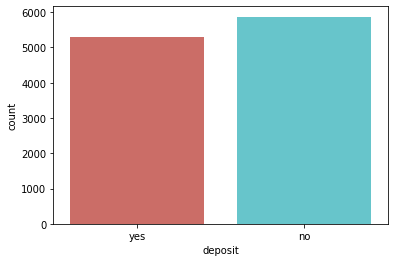

In [ ]:
sns.countplot(x="deposit", data=df, palette="hls")
plt.show()



In [ ]:
countAccepted = len(df[df.deposit == 'yes'])
countRejected = len(df[df.deposit == 'no'])


print("Percentage of Accepted deposit: {:.2f}%".format((countAccepted / (len(df.deposit))*100)))
print("Percentage of Rejected deposit: {:.2f}%".format((countRejected / (len(df.deposit))*100)))
#df.set_index("Feature_name")

Percentage of Accepted deposit: 47.38%
Percentage of Rejected deposit: 52.62%


تقریبا نیمی از شرکت کنندگان در کمپین، حساب باز کردن

In [ ]:
df['agecat']=pd.cut(df['age'], bins=[18, 30, 60, 95], labels=['18-30', '30-60', '60-95'])

تقسیم مخاطبان کمپین به سه بازه سنی

[Text(0, 0.5, 'Age Distribution')]

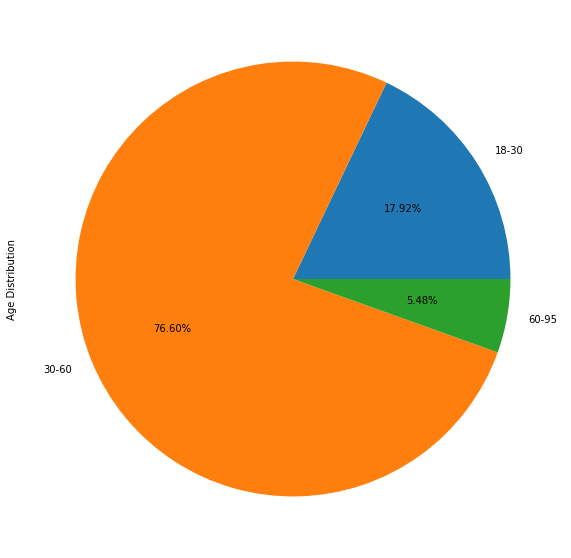

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
df.groupby('agecat').size().plot(kind='pie', autopct='%.2f%%', ax=ax)
ax.set(ylabel='Age Distribution')

اکثریت شرکت کنندگان در کمپین در محدوده سنی 30 تا 60 سال هستند

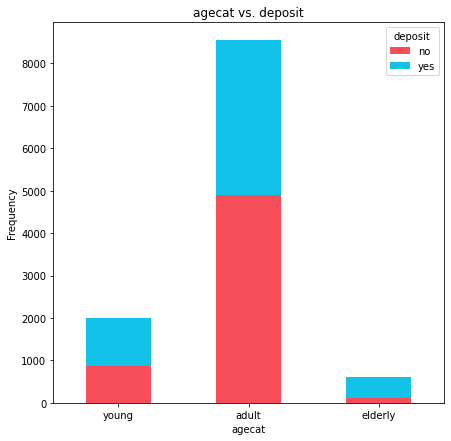

In [ ]:
pd.crosstab(df.agecat,df.deposit).plot(kind="bar", stacked=True, figsize=(7,7), color=['#f64f59','#12c2e9'])
plt.title('agecat vs. deposit')
plt.xlabel('agecat')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

این نمودار رابطه سن و باز کردن حساب رو نشون میده. در گروه سنی بالا درصد زیادی از افراد بعد از شرکت در کمپین حساب باز کردن و بازدهی بالا داشتیم. در گروه سنی میانسال که هدف اصلی کمپین بودن بازدهی در حدود 40 درصد داریم

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


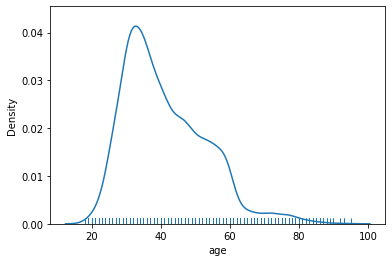

In [ ]:
sns.distplot(df['age'], hist=False, rug=True)
plt.show()

این نمودار توزیع سنی شرکت کنندگان در کمپین رو نشون میده. بیشترین شرکت کنندگان در بازه سنی 30 تا 40 قرار دارند که در ادامه میشه این بازه سنی رو  با جزئیات بیشتری بررسی کرد

[Text(0, 0.5, 'Job category')]

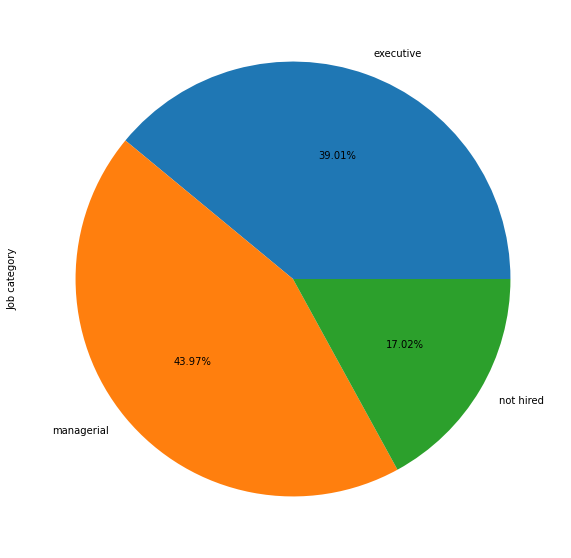

In [ ]:
update_jobs={
    'management':'managerial',
    'blue-collar':'managerial',
    'technician': 'executive',
    'admin.':'executive',
    'services':'executive',
    'retired':'not hired',
    'self-employed':'not hired', 
    'student':'not hired',
    'unemployed':'not hired',
    'entrepreneur':'managerial',
    'housemaid':'executive',
    'unknown':'managerial'
}
df['jobcat']=df['job'].replace(update_jobs)
df['jobcat']=df['jobcat'].astype('category')
fig, ax = plt.subplots(figsize=(10, 10))
df.groupby('jobcat').size().plot(kind='pie', autopct='%.2f%%', ax=ax)
ax.set(ylabel='Job category')

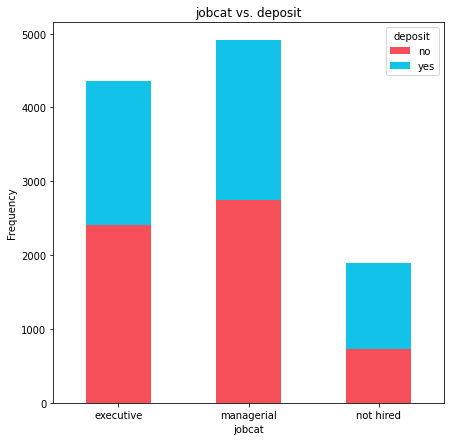

In [ ]:
pd.crosstab(df.jobcat,df.deposit).plot(kind="bar", stacked=True, figsize=(7,7), color=['#f64f59','#12c2e9'])
plt.title('jobcat vs. deposit')
plt.xlabel('jobcat')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

نمودار گروه های شغلی و باز کردن حساب
ذر افرادی که در استخدام جایی نیستند درصد بیشتری از افراد حساب باز کردن که در ظاهر میتونه نشان دهنده بازدهی بالاتر باشه اما چون این افراد شغل ندارن احتمال زیاد پول کمتری برای پس انداز در حساب بانکی خودشون دارن. از طرف دیگر درصد باز کردن حساب در گروه شغلی اجرایی کمی بالاتر از گروه مدیران هستش که شاید ناشی از نیاز به گرفتن وام باشه

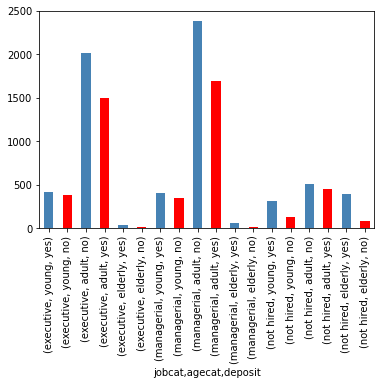

In [ ]:
df.groupby(['jobcat','agecat'])['deposit'].value_counts().plot(kind='bar', stacked=True, color=['steelblue', 'red'])

بیشترین درصد باز کردن حساب مربوط به بازه سنی 30 تا 60 سال و در گروه مدیران می باشد. در بازه سنی بالا بیشترین باز کردن حساب مربوط به گروهی هستش که استخدام نیستند که احتمالا شامل بازنشسته هایی هستش که پول خود را پس انداز کرده اند. 

In [ ]:
statistics=df.describe().iloc[[1, 3, 7], :]
statistics

,age,balance,day,duration,campaign,pdays,previous
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df['durationcat']=pd.cut(df['duration'], bins=[0, 60, 600, 3600], labels=['less than a minute', '1 min to 10 min', '10 min to 1 hour'])

تقسیم مدت زمان مکالمه به سه بازه زمانی برای درک بهتر




[Text(0, 0.5, 'Call Duration')]

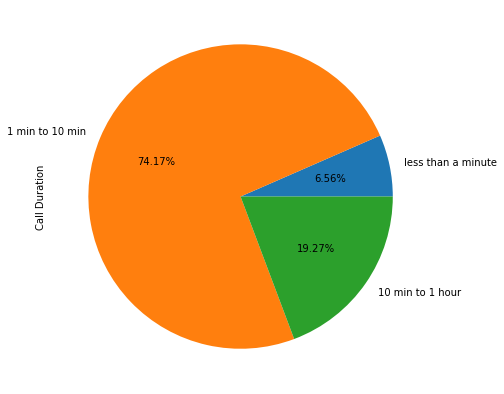

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
df.groupby('durationcat').size().plot(kind='pie', autopct='%.2f%%', ax=ax)
ax.set(ylabel='Call Duration')

اکثریت مکالمات بین یک تا ده دقیقه طول کشیده است و چیزی در حدود 6 درصد تقریبا پاسخگو نبودن و زود قطع کردن.

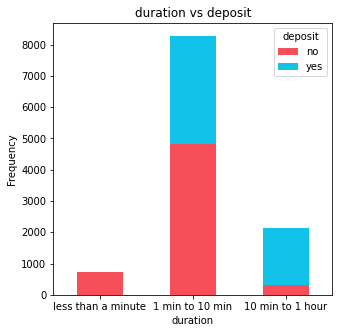

In [ ]:
pd.crosstab(df.durationcat,df.deposit).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('duration vs deposit')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

 اکثر مکالمات زیر 10 دقیقه طول کشیده که چیزی در حدود 40 درصد منجر به بازشدن حساب شده. مکالمات طولانی اغلب موفقیت آمیز بوده و درصد زیادی حساب باز کردن. مکالمات زیر 1 دقیقه هم اکثریت ناموفق بوده

در آینده بهتره که رکوردهای متعلق به زیر یک دقیقه حذف شود



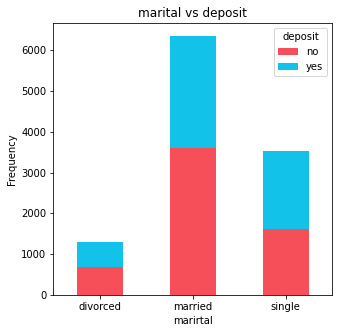

In [ ]:
pd.crosstab(df.marital,df.deposit).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('marital vs deposit')
plt.xlabel('marirtal')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

افراد مجرد به نسبت بیشتر از افراد متاهل و یا طلاق گرفته حساب باز کردن

In [ ]:
df['education'].replace({'unknown':'secondary'}, inplace=True)

[Text(0, 0.5, 'Call Duration')]

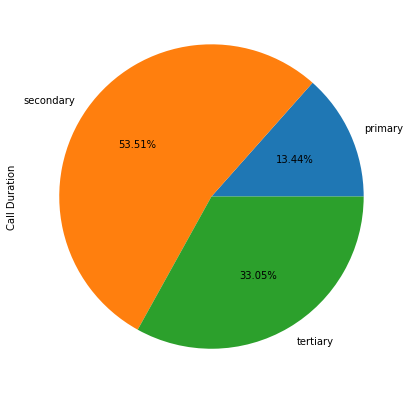

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
df.groupby('education').size().plot(kind='pie', autopct='%.2f%%', ax=ax)
ax.set(ylabel='Call Duration')

تفکیک تحصیلات مخاطبان به درصد

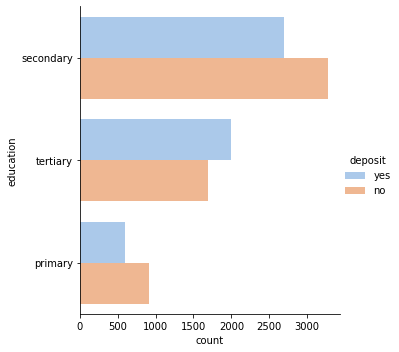

In [ ]:
sns.catplot(y='education', hue='deposit', kind='count', palette='pastel', data=df)

تقریبا نیمی از افرادی که تحصیلات عالیه 
دارند حساب باز کردن

این درصد در افرادی که تحصیلات کمتری دارند به مراتب کمتر است

[Text(0, 0.5, 'seasons')]

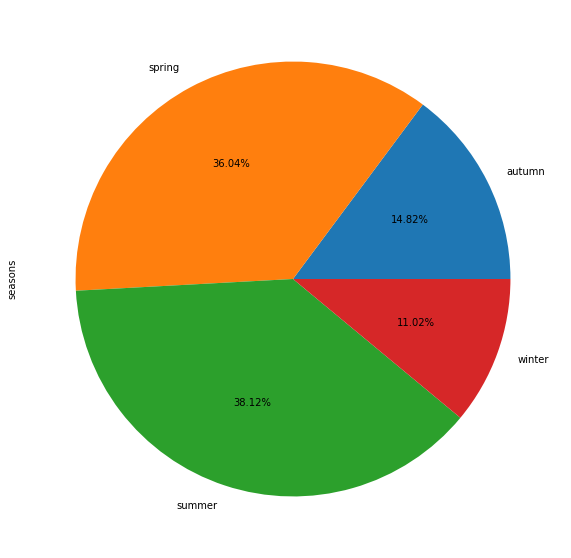

In [ ]:
update_months={
    'mar':'spring',
     'apr':'spring',
      'may':'spring',
    'jun':'summer',
    'jul':'summer',
    'aug':'summer',
    'sep':'autumn',
     'oct':'autumn',
    'nov': 'autumn',
    'dec':'winter',
     'jan':'winter',
      'feb':'winter'
}
df['monthcat']=df['month'].replace(update_months)
df['monthcat']=df['monthcat'].astype('category')
fig, ax = plt.subplots(figsize=(10, 10))
df.groupby('monthcat').size().plot(kind='pie', autopct='%.2f%%', ax=ax)
ax.set(ylabel='seasons')

کمپین برگزار شده به تفکیک فصول
بیشترین کمپین ها در تابستان و بهار انجام شده است. کمترین مربوط به زمستان می باشد که احتمالا بخاطر تعطیلات سال نو می باشد

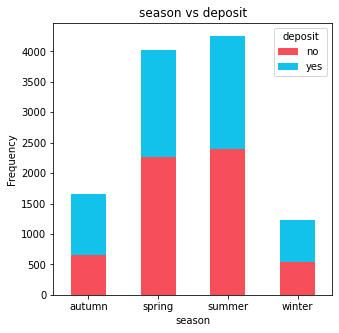

In [ ]:
pd.crosstab(df.monthcat,df.deposit).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('season vs deposit')
plt.xlabel('season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

در پاییز نسبت بیشتری از افراد حساب باز کردن. این نسبت برای بهار و تابستان تقریبا مشابه است

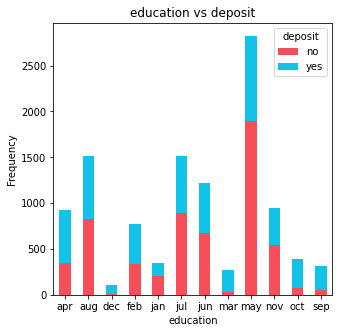

In [ ]:
pd.crosstab(df.month,df.deposit).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('education vs deposit')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

بیشترین کمپین برگزار شده در ماه می می باشد. کمترین هم مربوط به ماه دسامبر و تعطیلات سال نو می باشد که البته درصد بسیار زیادی منجر به باز شدن حساب شده است. درصد موفقیت ذر ماه های سپتامبر و اکتبر و نیز مارچ قابل توجه هستش. کمترین درصد موفقیت کمپین هم مربوط به ژآنویه هستش

In [ ]:
df['daycat']=pd.cut(df['day'], bins=[1, 15, 31], labels=['first half', 'second half'])

تقسیم ماه به دو قسمت

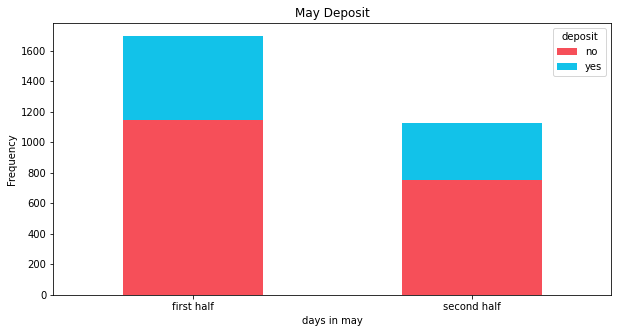

In [ ]:
k=df[df["month"] == "may"]
pd.crosstab(k.daycat,k.deposit).plot(kind="bar", stacked=True, figsize=(10,5), color=['#f64f59','#12c2e9'])
plt.title('May Deposit')
plt.xlabel('days in may')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

در نیمه اول ماه می تعداد بیشتری از افراد در کمپین شرکت کردند و نسبت بالاتری اقدام به باز کردن حساب کردن

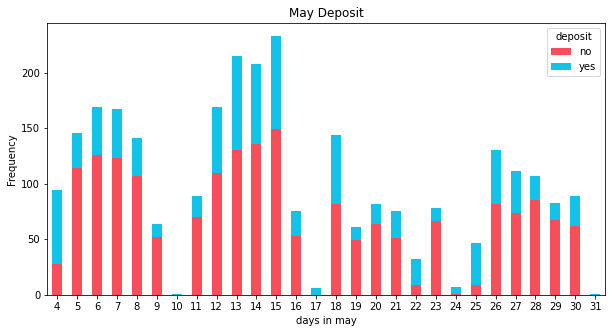

In [ ]:
k=df[df["month"] == "may"]
pd.crosstab(k.day,k.deposit).plot(kind="bar", stacked=True, figsize=(10,5), color=['#f64f59','#12c2e9'])
plt.title('May Deposit')
plt.xlabel('days in may')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

آمار مربوط به ماه می به تفکیک روز
در روزهای تعطیل کمپین اجرا نمیشود.
نیمه اول آمار بالاتری نسبت به نیمه دوم ماه دارد

In [ ]:
df['balancecat']=pd.cut(df['balance'], bins=[-6850, 0, 30000, 81205], labels=['indebted', 'normal', 'rich'])

[Text(0, 0.5, 'Balance Distribution')]

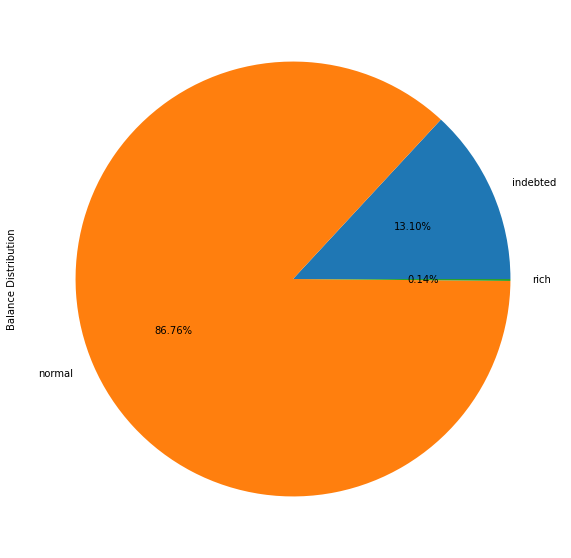

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
df.groupby('balancecat').size().plot(kind='pie', autopct='%.2f%%', ax=ax)
ax.set(ylabel='Balance Distribution')

نزدیک به 13 درصد از افراد میزان حسابشان منفی هستش و اکثریت افراد در قشر متوسط جامعه هستند. 

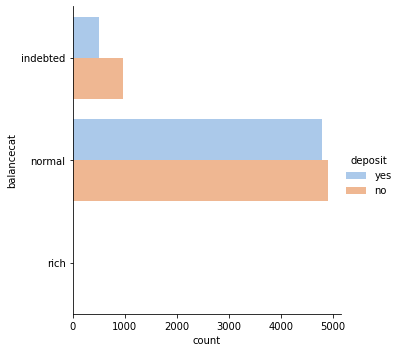

In [ ]:
sns.catplot(y='balancecat', hue='deposit', kind='count', palette='pastel', data=df)

افرادی که حسابشان منفی بود تمایل کمتری به باز کردن حساب دارن.

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


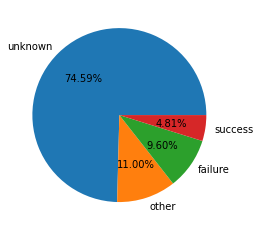

In [ ]:
poutcome_counts=df['poutcome'].value_counts()
print(poutcome_counts)

plt.pie(df['poutcome'].value_counts(), labels=df['poutcome'].unique(), autopct='%1.2f%%')
plt.show()

از نمودار بالا متوجه می شویم که نتیجه کمپین قبلی چندان خوب نبوده و نرخ موفقیت زیر 5 درصد بوده.  البته اکثریت داده نامشخض هستش.

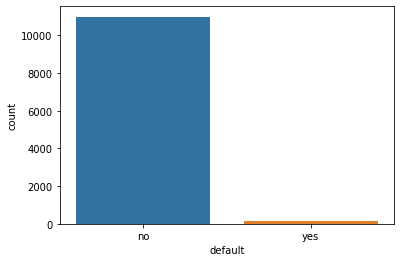

In [ ]:
sns.countplot(x='default', data=df)

اکثریت افراد بدهی قبلی نداشتن

In [ ]:
df['contact'].replace({'unknown':'cellular'}, inplace=True)

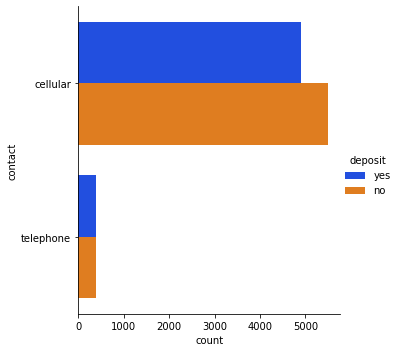

In [ ]:
sns.catplot(y='contact', hue='deposit', kind='count', palette='bright', data=df)

اکثر تماس ها از طریق تلفن همراه انجام شده 

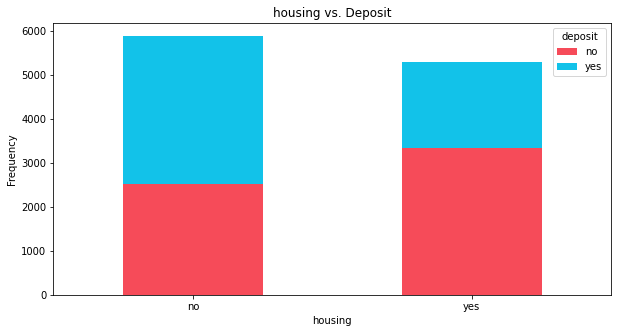

In [ ]:
pd.crosstab(df.housing,df.deposit).plot(kind="bar", stacked=True, figsize=(10,5), color=['#f64b59','#12c2e9'])
plt.title('housing vs. Deposit')
plt.xlabel('housing')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

تقریبا نیمی از افراد وام مسکن داشته اند که درصد کمتری از این افراد حساب باز کرده اند 

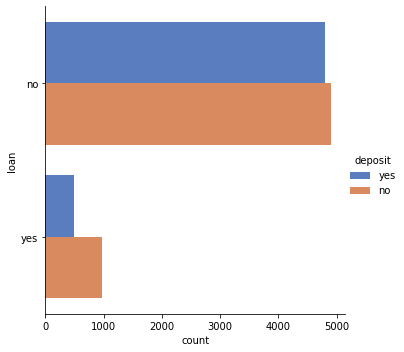

In [ ]:
sns.catplot(y='loan', hue='deposit', kind='count', palette='muted', data=df)

اکثریت افراد وام شخصی نداشته اند. در کسانی که وام داشتن نرخ باز کردن حساب کمتر بوده

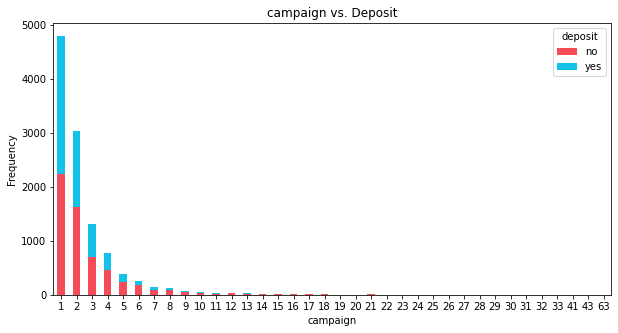

In [ ]:
pd.crosstab(df.campaign,df.deposit).plot(kind="bar", stacked=True, figsize=(10,5), color=['#f64b59','#12c2e9'])
plt.title('campaign vs. Deposit')
plt.xlabel('campaign')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

این نمودار تعداد تماس های انجام شده با فرد در طول این کمچپی را نشان می دهد. که با درصد زیادی از افراد یکبار تماس گرفته شده است. با یک فرد 63 بار تماس گرفته شده است. ولی داده نشان می دهد که با اکثریت افراد زیر 6 بار تماس گرفته شده است. هر چقدر تعداد تماس ها بیشتر شده نرخ موفقیت کمتر شده

**Conclusion**

1- کمپین های آینده باید بر روی بازه سنی سی تا شصت سال متمرکز باشند (رده مدیران)
2- تماس ها از طریق تلفن همراه گرفته شود
3- تماس های به فرد از 3 تماس بیشتر نشود
4- بیشترین فعالیت در ماه می بود ولی نرخ موفقیت در ماه مارس و سپتامبر و اکتبر بیشتر بود پس بهتره تمرکز کمپین ها در زمستان باشد
5- مدت زمان تماس ها باید زیر ده دقیقه باشد
6-افرادی که وام منزل دارن و بدهی قبلی ندارند بهترین افراد می باشند
7-دانش اموزان گروه مناسبی برای کمپین هستند